In [1]:
import pandas as pd
collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)
pd.set_option("max_columns", None)

%matplotlib inline

In [2]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/16/2016,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
2,04/16/2016,4:22,NaN,NaN,NaN,NaN,NaN,BORDEN AVENUE,58TH STREET,NaN,1,0,1,0,0,0,0,0,Passenger Distraction,NaN,NaN,NaN,NaN,3425902,NaN,NaN,NaN,NaN,NaN
3,04/16/2016,4:30,BRONX,10468.0,40.862679,-73.909040,"(40.8626793, -73.9090397)",SEDGWICK AVENUE,WEST FORDHAM ROAD,NaN,0,0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,3414396,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,04/16/2016,4:30,BROOKLYN,11249.0,40.716508,-73.961275,"(40.7165078, -73.9612751)",NaN,NaN,203 BERRY STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3421852,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


The next library we'll explore is `mpld3`. The pitch for `mpld3` is really short and simple: you're using `matplotlib` and you want interactivity, but you don't want to work very hard for it.

So `mpld3` is the first library we'll look at which attempts to add interactivity to your visualizations. We'll see many others later.

Using `mpld3` is as simple as importing it, enabling it, and then adding just a simple line of code to our plots.

In [3]:
import mpld3
mpld3.enable_notebook()

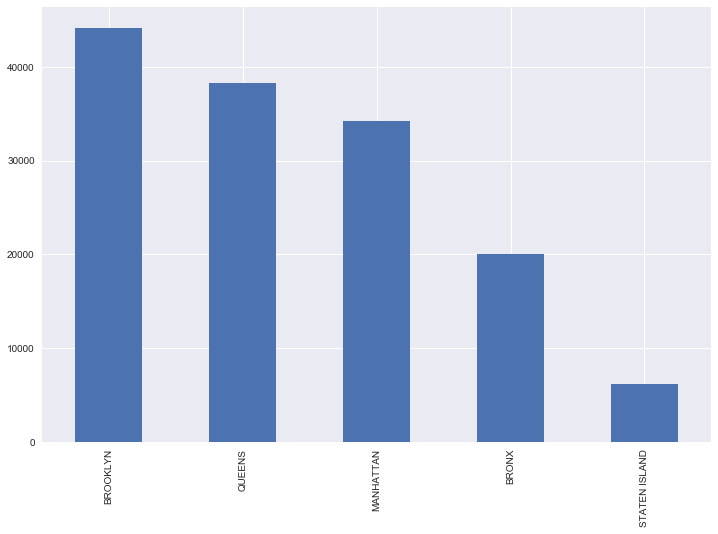

In [13]:
df = collisions['BOROUGH'].value_counts()

df.plot.bar(figsize=(12, 8))

This gives us the ability to pan around, to zoom, and to go back to home, all in a little toolbox on the lower edge of the plot.

`mpld3` works by serializing the underlying `matplotlib` object into a JSON schema, which it then feeds into its own JavaScript engine (powered by `D3.JS`) to render the plots interactively.

This approach means that `mpld3` doesn't pay any attention to what you actually plot, per se. It can be used as a drop-in within the Jupyter plotting environment, and it will successfully convert most `pandas` and `seaborn` visualizations.

In the case of the bar plot above, that's not actually particularly useful. Let's use it to interactivize something more interesting.

Let's reuse the composite imports plot from our `ggplot` examples to demo this.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from ggplot import meat

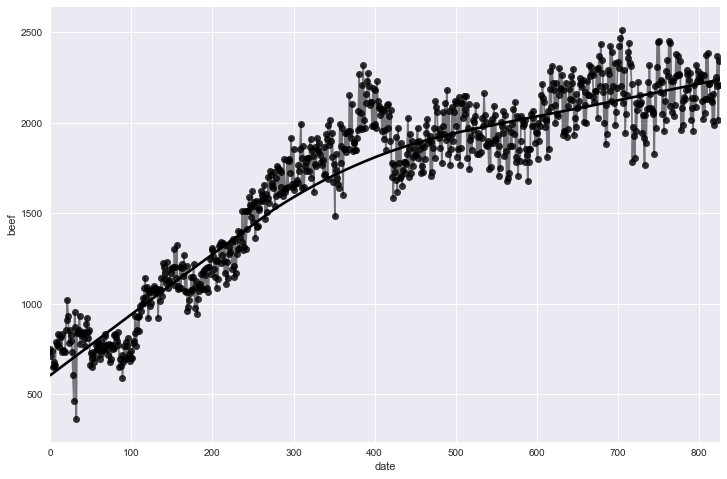

In [7]:
fig = plt.figure(figsize=(12, 8))

meat['beef'].plot.line(color='black', alpha=0.5)
sns.regplot(x="date", y="beef", data=meat.assign(date=range(len(meat))), lowess=True, color='black')

Note: unfortunately, even though `ggplot` is also `matplotlib`-based it doesn't interact with `mpld3` too well.

Further extensions to interactivity are provided by `mpld3` plugins and tooltips. For example, in the following plot I added a little plugin that displays your position on the screen, data-wise, when you mouse over.

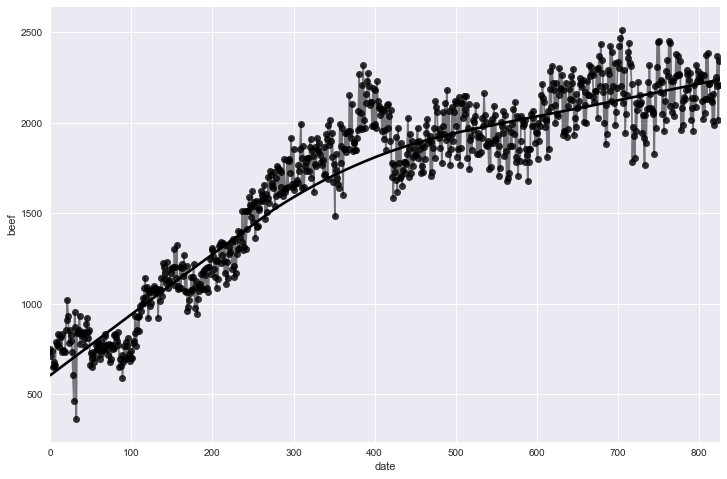

In [8]:
fig = plt.figure(figsize=(12, 8))

meat['beef'].plot.line(color='black', alpha=0.5)
sns.regplot(x="date", y="beef", data=meat.assign(date=range(len(meat))), lowess=True, color='black')

mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))

However, these plugins don't seem to reliably work with plots not built in pure `matplotlib`. For example, I couldn't get a scatter plot mouseover number to work.

TODO: Investigate this further.

In [9]:
# fig, ax = plt.subplots()

# # meat['beef'].plot.line(color='black', alpha=0.5)
# # sns.regplot(x="date", y="beef", data=meat.assign(date=range(len(meat))), lowess=True, color='black')
# scatter = meat.assign(date=range(len(meat))).plot.scatter(x='date', y='beef')

# # mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))

# labels = list(meat['date'].astype(str).values)

# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
# mpld3.plugins.connect(fig, tooltip)

Want to write your own plugin? You'd need to use JavaScript and D3.JS in order to do that. Here's an example of such an interactive, from the `mpld3` documentation:

In [11]:
import numpy as np

In [12]:
from mpld3 import plugins, utils
import matplotlib as mpl

class LinkedView(plugins.PluginBase):
    """A simple plugin showing how multiple axes can be linked"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline", "data"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line = mpld3.get_element(this.props.idline);
      var data = this.props.data;

      function mouseover(d, i){
        line.data = data[i];
        line.elements().transition()
            .attr("d", line.datafunc(line.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line, linedata):
        if isinstance(points, mpl.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "data": linedata}

fig, ax = plt.subplots(2)

# scatter periods and amplitudes
np.random.seed(0)
P = 0.2 + np.random.random(size=20)
A = np.random.random(size=20)
x = np.linspace(0, 10, 100)
data = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])
points = ax[1].scatter(P, A, c=P + A,
                       s=200, alpha=0.5)
ax[1].set_xlabel('Period')
ax[1].set_ylabel('Amplitude')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
ax[0].set_ylim(-1, 1)

ax[0].set_title("Hover over points to see lines")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
plugins.connect(fig, LinkedView(points, lines[0], linedata))

mpld3.display()

Why write JavaScript code? Because whilst all of our tools before compiled directly to either a static PNG or, in the case of `pygal` an SVG with a few CSS modifiers, `mpld3` intercedes directly and throws your output at a JavaScript GUI renderer instead, implemented in D3.JS, which *then* writes that to an interactive SVG.

Of course, the catch is that we don't *want* to write JavaScript code. In that case we have to get by with interactive plugins which, by their cross-language, know-nothing nature, are easy to break and hard to debug.

So what can we say about `mpld3` overall? `mpld3` was at the time of its introduction and continues to be a stopgap solution. You get panning, zooming, and scrolling instantly, and can oftentimes squeeze a little more interactivity out of things using plugins. It's a great tool to use it when you can get away with just that, but for more difficult tasks other tools will serve you better.

`mpld3`

* Advantages
  * Simple drop-in interactivity for most `matplotlib`-based charts.
* Disadvantages
  * For non-trivial tasks, eclipsed by other tools.
  * Due to JavaScript dependence, plots don't display in a static notebook.
* Analogy
  * Grease pencil: a drawing medium that was popular in the military during the mid-20th century because it could be used to write messages on glass in a way easily visible across, say, a crowded aircraft carrier pilot room. Still useful in a pinch, but now eclipsed by other technologies.
  
Bottom line, I wouldn't recommend straying further than `import mpld3; mpld3.enable_notebook()`.

There's one more thing to say. `mpld3` was, far as I'm aware, the first (at least, first successful) attempt at serializing `matplotlib` charts into another format. The core of that, the serialization part, is done by a small utility library called [`mplexporter`](https://github.com/mpld3/mplexporter). This little module is a bit of a leftpad: it has just 30-odd stars on GitHub, but it powers everything that `mpld3` does, and it provides core capacities for the two other libraries that we're going to look at.

In a sense, `mplexporter` is the most important legacy of `mpld3`. `mplexporter` is at this point mostly unmaintained and provided kind of as-is. It has a lot of gaps in the way it works that stem from difficulties with serializing parts of `matplotlib` that aren't easy to work out. This fact led directly to something called [Matplotlib Enhancement Proposal 25](http://stackoverflow.com/questions/39322522/bokehs-to-bokeh-ignores-legend-from-matplotlib), which was a proposal to inject schema directly into `matplotlib` itself. Sadly it's been hanging around for three years now and it's never gotten off the ground, so `mplexporter` we will continue to use.